In [24]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 

In [18]:
import  quandl as Quandl

import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')

# Not necessary, I just do this so I do not show my API key.
api_key = open('key.txt','r').read()

def state_list():
    fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
    return fiddy_states[0][0][1:]
    

def grab_initial_state_data():
    states = state_list()

    main_df = pd.DataFrame()

    for abbv in states[:5]:
        try:
            query = "FMAC/HPI_"+str(abbv)
            print(query)
            df = Quandl.get(query, authtoken=api_key)
            df['Value'] = (df['Value']-df['Value'][0]) / df['Value'][0] * 100.0
            print(df.head())
#             if main_df.empty:
#                 main_df = df
#             else:
#                 main_df = main_df.join(df)
            main_df[abbv] = df['Value']
        except:
            print('pass ' + abbv)
            
    pickle_out = open('fiddy_states3.pickle','wb')
    pickle.dump(main_df, pickle_out)
    pickle_out.close()
    return main_df

def HPI_Benchmark():
    df = Quandl.get("FMAC/HPI_USA", authtoken=api_key)
    df["United States"] = (df["United States"]-df["United States"][0]) / df["United States"][0] * 100.0
    return df

In [21]:
all_data = grab_initial_state_data()

FMAC/HPI_AL
               Value
Date                
1975-01-31  0.000000
1975-02-28  0.563941
1975-03-31  1.221516
1975-04-30  2.017970
1975-05-31  2.730277
FMAC/HPI_AK
               Value
Date                
1975-01-31  0.000000
1975-02-28  1.443292
1975-03-31  2.921545
1975-04-30  4.479968
1975-05-31  6.221807
FMAC/HPI_AZ
               Value
Date                
1975-01-31  0.000000
1975-02-28  1.622304
1975-03-31  3.185277
1975-04-30  4.447226
1975-05-31  5.162205
FMAC/HPI_AR
               Value
Date                
1975-01-31  0.000000
1975-02-28  1.044229
1975-03-31  1.962586
1975-04-30  2.707659
1975-05-31  3.388223
FMAC/HPI_CA
               Value
Date                
1975-01-31  0.000000
1975-02-28  0.310304
1975-03-31  1.550517
1975-04-30  3.571143
1975-05-31  5.208027


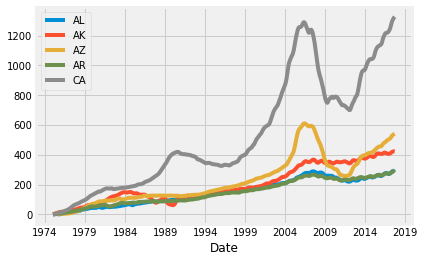

In [31]:
all_data.plot()

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=20,center=False).mean()
  


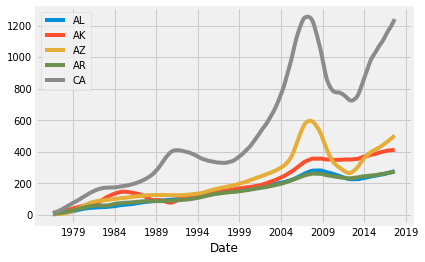

In [32]:
import pandas
pandas.rolling_mean(all_data,20).plot()